 #Data Analysis of Eye Fundus Diseases for Different Ages and Sexes

importing python libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Importing data and preprocesssing


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving full_df.csv to full_df.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['full_df.csv']))
print(data)


        ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6387  4686           63        Male  4686_left.jpg  4686_right.jpg   
6388  4688           42        Male  4688_left.jpg  4688_right.jpg   
6389  4689           54        Male  4689_left.jpg  4689_right.jpg   
6390  4690           57        Male  4690_left.jpg  4690_right.jpg   
6391  4784           58        Male  4784_left.jpg  4784_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                        

In [ ]:
data.tail()
#returns first 5 rows

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                     target     filename  
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg

#Importing data shows us that labels can be used for classification. Now eliminating unneeded columns are needed.

In [ ]:
data_melted = data.drop(data.columns[list(range(3,16))+list(range(18,19))], axis=1)

In [ ]:
data_melted.head()

ID  Patient Age Patient Sex labels                    target
0   0           69      Female  ['N']  [1, 0, 0, 0, 0, 0, 0, 0]
1   1           57        Male  ['N']  [1, 0, 0, 0, 0, 0, 0, 0]
2   2           42        Male  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
3   4           53        Male  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
4   5           50      Female  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]

Now, labels need to be translated to string for visualization.

In [ ]:
string_labels = []
for each in data_melted.labels:
    if(len(each)==5):
        string_labels.append(each[2])
    else:
        print(each)

 #There is no printing, hence no double diseases.       

In [ ]:
data_melted = data_melted.drop(data_melted.columns[[0, 3, 4]], axis=1)
data_melted = pd.concat([data_melted, pd.DataFrame(string_labels, columns = ['Labels'])], axis=1)

In [ ]:
data_melted.head()

#Now data is ready


Patient Age Patient Sex Labels
0           69      Female      N
1           57        Male      N
2           42        Male      D
3           53        Male      D
4           50      Female      D

#Data Visualization
Note the following:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

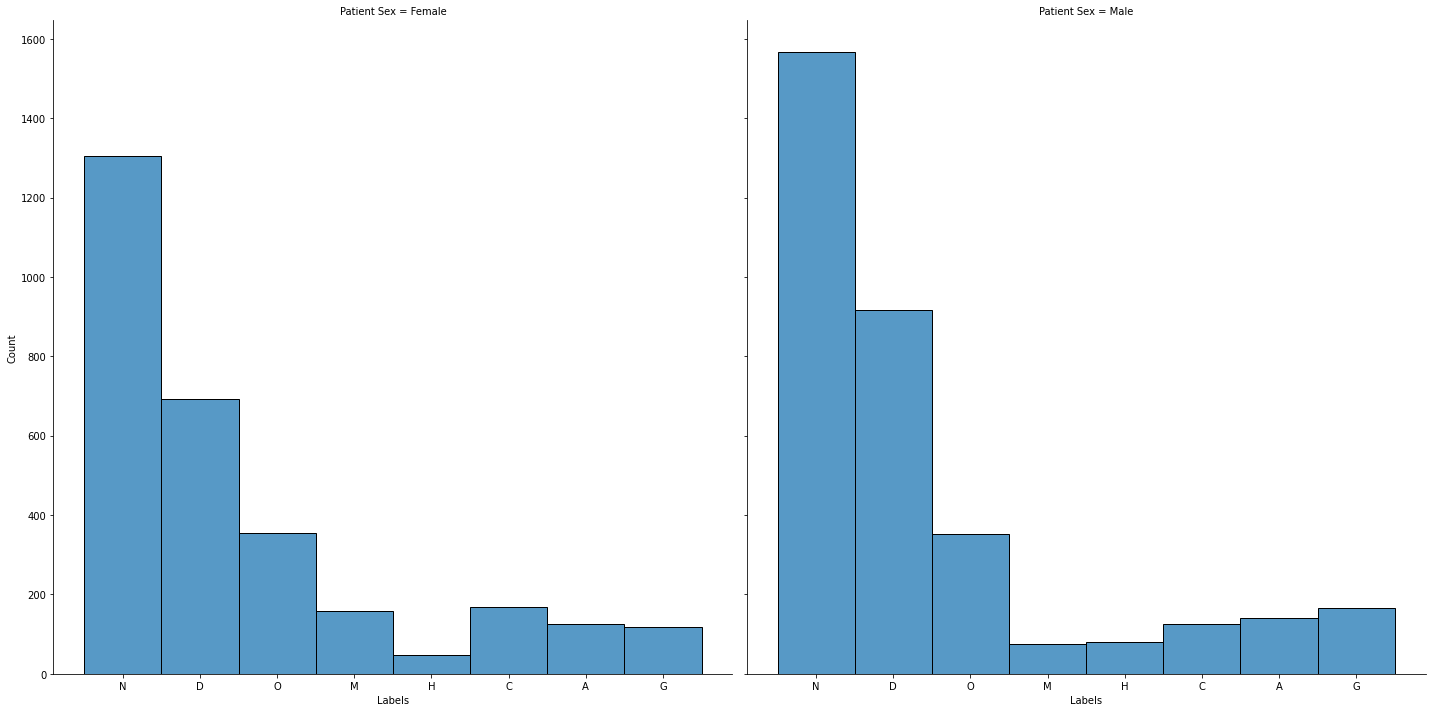

In [ ]:
import seaborn as sns
sns.displot(data_melted, x="Labels", col="Patient Sex",
    binwidth=6, height=10, facet_kws=dict(margin_titles=True),)
plt.show()

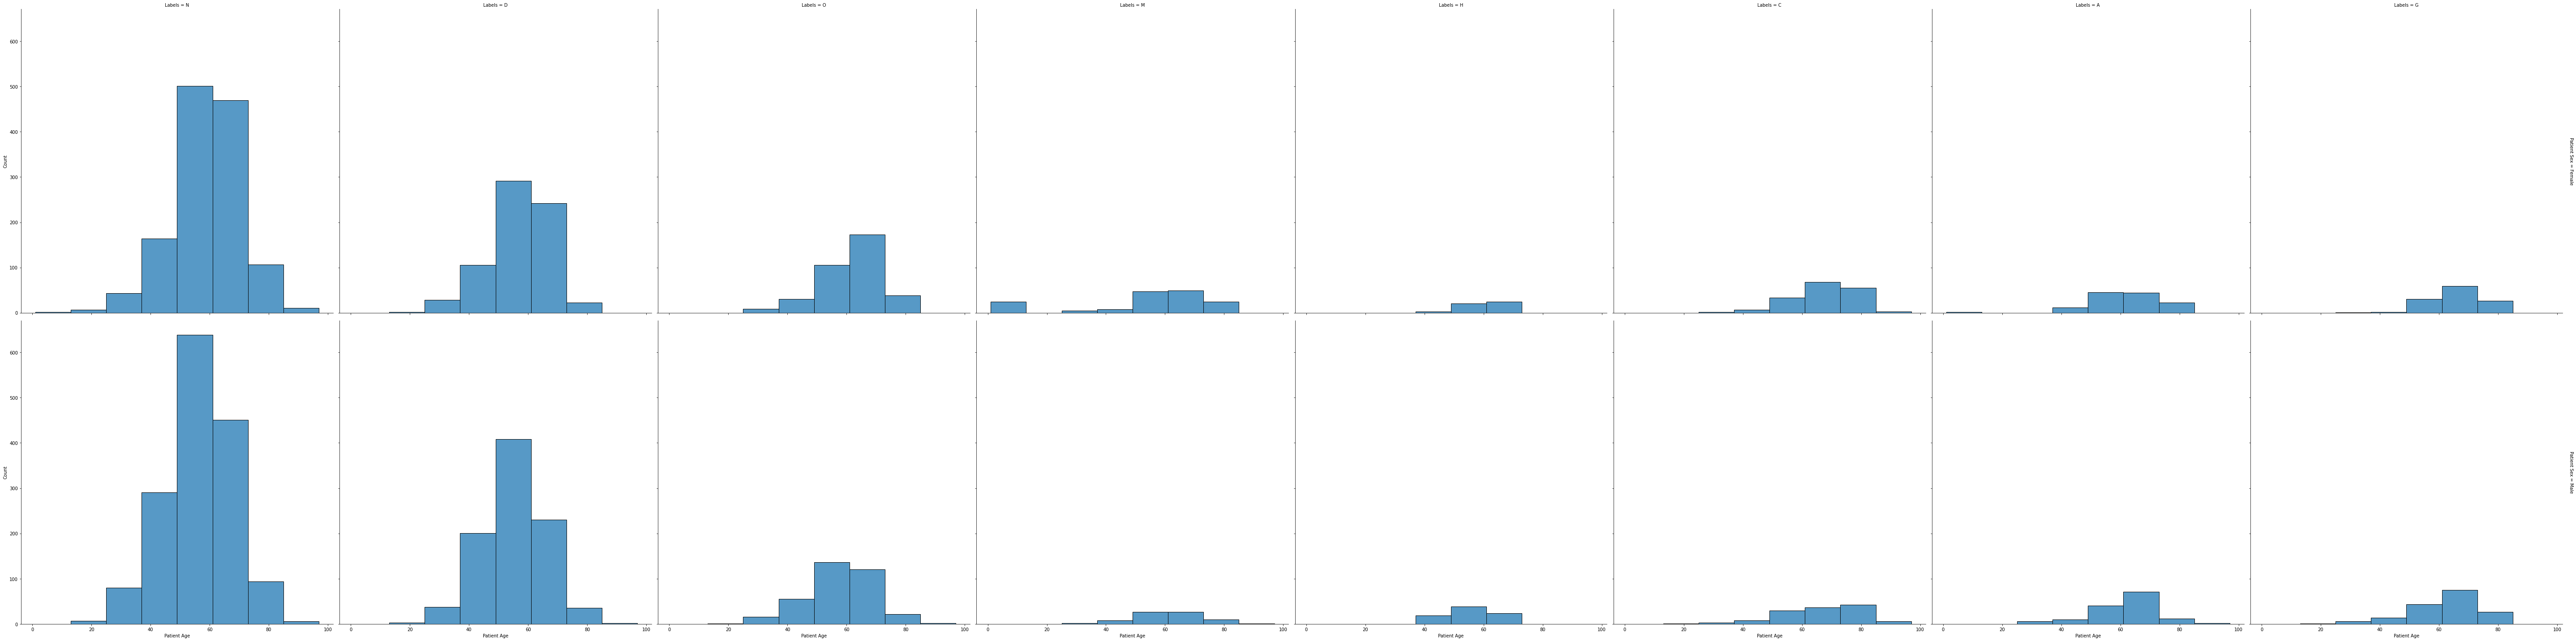

In [ ]:
sns.displot(data_melted, x="Patient Age", col="Labels", row='Patient Sex',
    binwidth=12, height=10, facet_kws=dict(margin_titles=True),)
plt.show()